In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
# Adjust the path
unicorns_csv_path= '/Users/eleni_icon/Unicorns/2 Data/Prepared data/Cleaned_Unicorns_Data.csv'
data =pd.read_csv(unicorns_csv_path)

In [3]:
# Convert 'Date Joined' to datetime
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

# Calculate 'Company Age' from 'Year Joined' based on the last year in your data (2023)
data['Company Age'] = 2023 - data['Year Joined']

# Check and handle extreme values in 'Valuation ($B)'
data['Valuation ($B)'] = data['Valuation ($B)'].apply(pd.to_numeric, errors='coerce')
data = data[data['Valuation ($B)'] < data['Valuation ($B)'].quantile(0.99)]  # Removing top 1% as outliers if needed


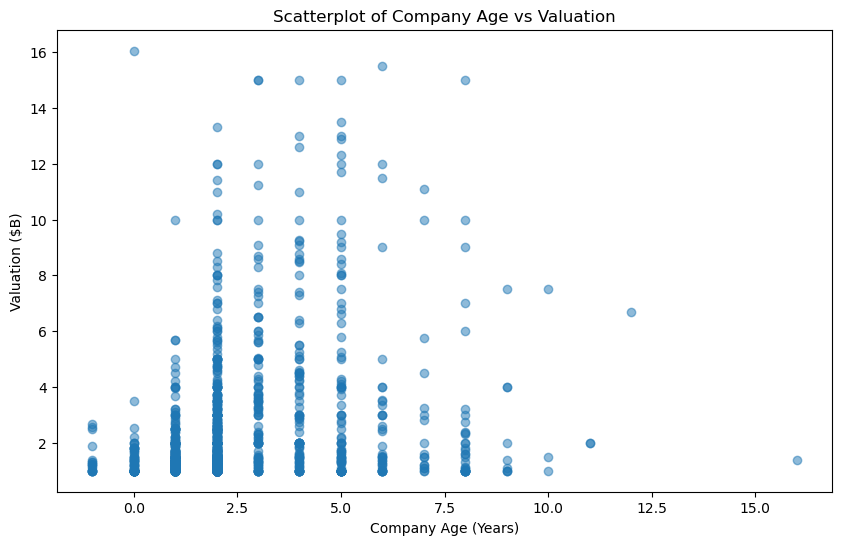

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Company Age'], data['Valuation ($B)'], alpha=0.5)
plt.title('Scatterplot of Company Age vs Valuation')
plt.xlabel('Company Age (Years)')
plt.ylabel('Valuation ($B)')
plt.show()

Scatterplot of Company Age vs Valuation ($B)

1. Peak Valuations at Early Ages:
   The majority of companies with higher valuations (e.g., above $6B) are relatively young, with ages between 0 to 5 years. This suggests that companies often achieve their peak valuations within their first few years of operation, possibly driven by venture capital investment, innovation, or rapid market capture.

2. Valuation Declines with Age:
   As company age increases beyond 5 years, the number of companies with high valuations decreases significantly. Older companies may stabilize in their valuation or experience slower growth due to market saturation or operational constraints.

3. High Variability:
   There is significant variability in valuations, especially for companies aged between 0 and 5 years. Some companies achieve valuations well above 10B, while others remain below 2B, indicating that external factors (e.g., industry, geography, or funding) may influence these differences.

### 5.Hypothesis
**H0:** There is no relationship between the age of a company and its valuation.
**H1:** There is a significant relationship between the age of a company and its valuation.


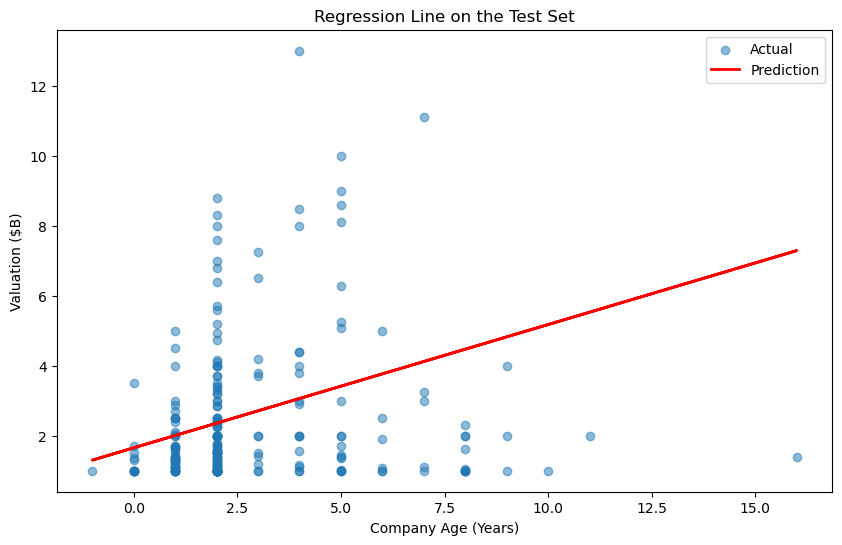

MSE: 4.4439696379371405
R² Score: -0.07797943943428542
   Actual Valuation  Predicted Valuation
0               1.6             2.358709
1               3.0             2.006454
2               9.0             3.415475
3               1.0             3.415475
4               1.3             2.006454


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 6.Prepare data
X = data['Company Age'].values.reshape(-1, 1)
y = data['Valuation ($B)'].values

# 7.Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8.Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# 9.Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Regression Line on the Test Set')
plt.xlabel('Company Age (Years)')
plt.ylabel('Valuation ($B)')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

# 12.Compare predicted vs actual
comparison_df = pd.DataFrame({'Actual Valuation': y_test, 'Predicted Valuation': y_pred})
print(comparison_df.head())


1. Positive Slope:
   The regression line has a slight positive slope, suggesting a weak positive correlation between company age and valuation. This indicates that, on average, valuations increase slightly as companies age, but the relationship is not strong.

2. Poor Fit:
   The regression line does not align well with the data points. The model struggles to capture the variability in valuations, especially for younger companies. This is reflected in the spread of actual points around the line.

3. Outliers:
   There are a few companies with much higher valuations that the model fails to predict accurately. These outliers highlight the limitations of using a simple linear regression for this dataset.